# Exercise 3

Rebecca Ghidoni

ID:2026709
***

In [18]:
library(dplyr)
options(repr.plot.width=9, repr.plot.height=7)


In [19]:
library(GoFKernel)

## Exercise 1

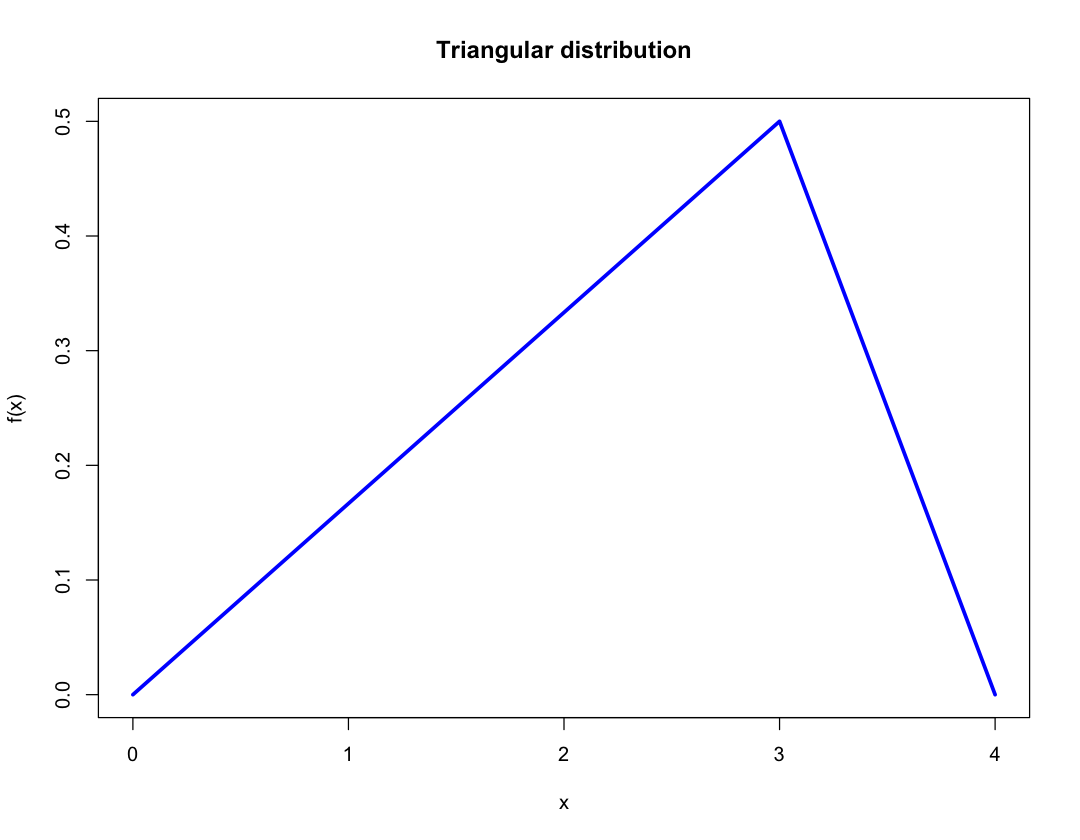

In [3]:
dfunc <- Vectorize( function(x,a,b,c){
    
        if(x >= a & x<c){X = 2*(x-a)/( (b-a)*(c-a) ) 
            return(X)}
    
        else if(x >=c & x <=b){X = 2*(b-x)/( (b-a)*(b-c) ) 
            return(X)}
    
        else{
            return(0)}
        } )

a = 0
b = 4
c = 3

x = seq(a,b,by=0.05)
plot(x,dfunc(x,a=a,b=b,c=c), type='l', col='blue', xlab='x',ylab='f(x)',main='Triangular distribution',lwd=3)

In [4]:
pfunc <- Vectorize( function(x,a=0,b=1,c=0.5){
         
         if(x<=a){
             X <- 0
             return(X)}
    
         else if(x >= a & x<c){
            X <- integrate(dfunc,lower=a,upper=x,a=a,b=b,c=c)$value  
            return(X)}
    
         else if(x >=c & x <=b){
            X <- (c-a)*dfunc(c,a=a,b=b,c=c)/2 +
                 integrate(dfunc,lower=c,upper=x,a=a,b=b,c=c)$value   
            return(X)}
             
         else if(x>=b){
             X <- 1
             return(X)}
             
         } )


# Define the quantile function as the inverse of the cumulative

qfunc <- Vectorize( function(p,a=0,b=1,c=0.5){
    
                    f <- function(x) pfunc(x,a=a,b=b,c=c)    
                    h <- pfunc(c,a=a,b=b,c=c)
    
                    if(p<=h){
                        pfunc.inv <- inverse(f,lower=a,upper=c)}
    
                    else if(p>h){
                        pfunc.inv <- inverse(f,lower=c,upper=b)}               
                        
                    return(pfunc.inv(p))
         } )

# Define the sampling function
rfunc <- function(n,a=0,b=1,c=0.5,bool=FALSE,seed=123){
        if(bool){ set.seed(seed) }       
        p <- runif(n)
        x <- qfunc(p,a=a,b=b,c=c)   
        return(x)
    }

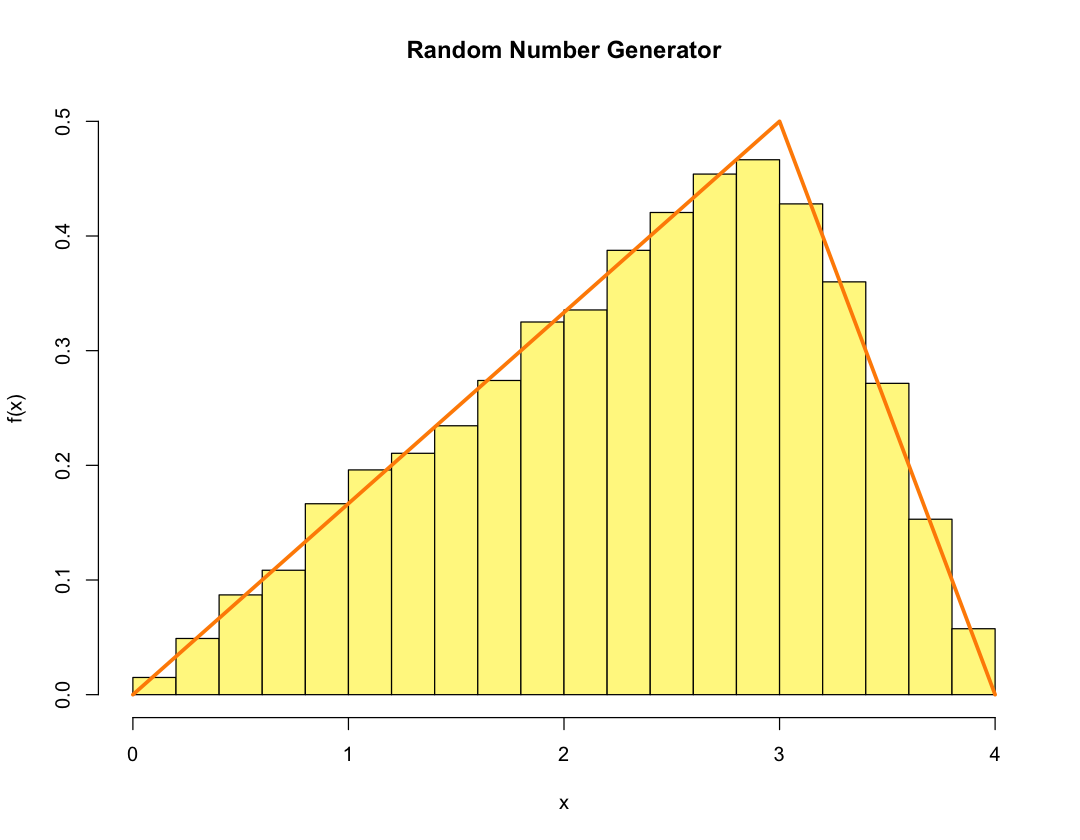

In [5]:
    
n = 10000
x = rfunc(n,a=a,b=b,c=c,bool=TRUE,seed=12)

hist(x, col='khaki1', xlab='x', ylab='f(x)',main="Random Number Generator",prob=TRUE,ylim=c(0,2/(b-a)))

lines(seq(a,b,by=0.05),dfunc(seq(a,b,by=0.05),a=a,b=b,c=c),type='l', col='darkorange', lwd=3)



## Exercise 2 - Markov's Inequality

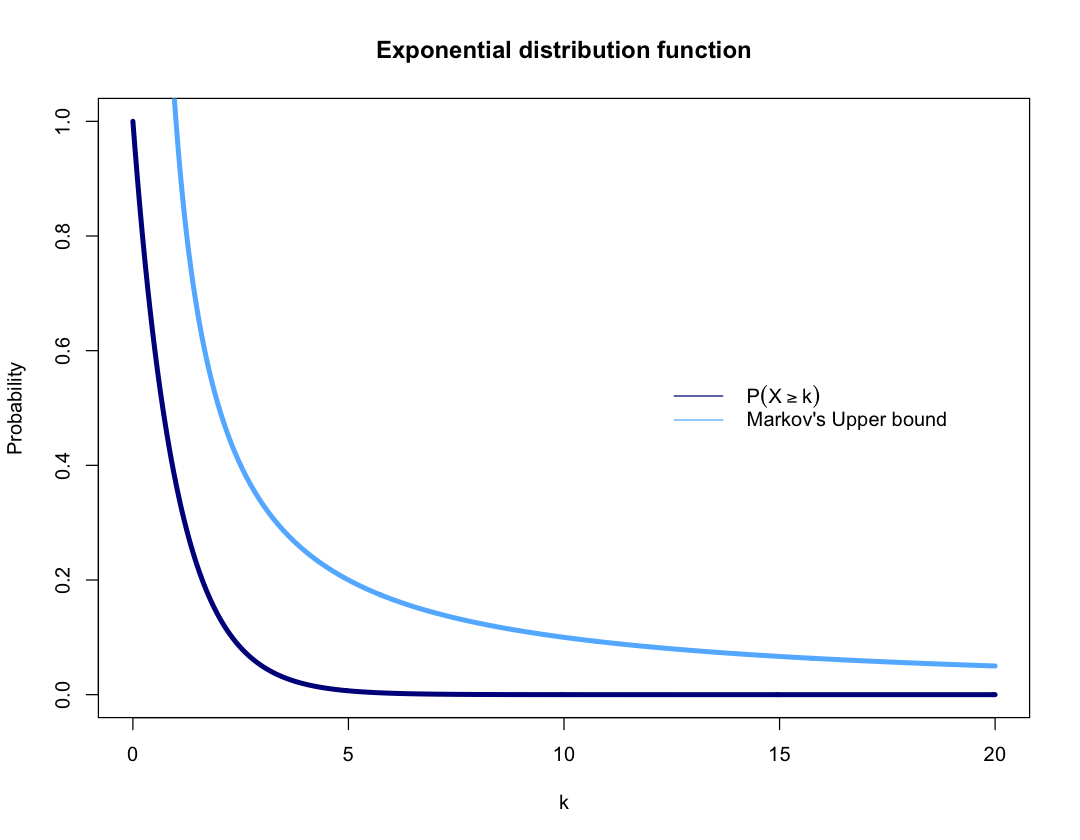

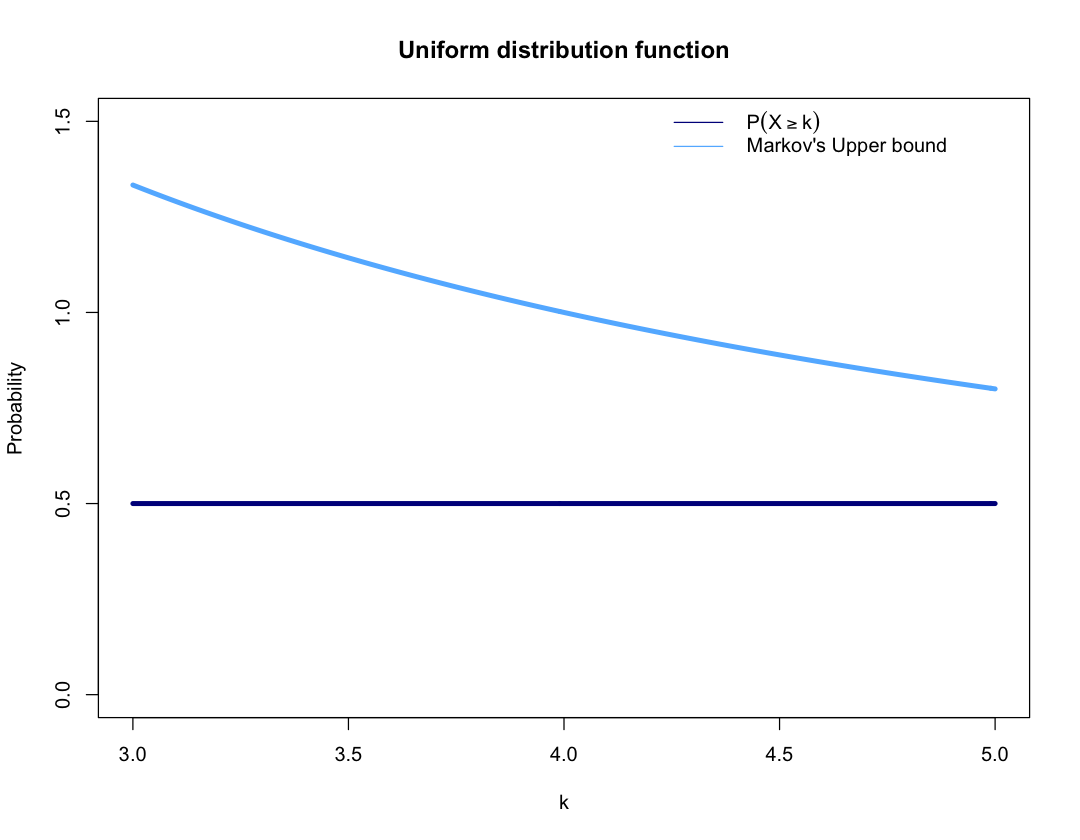

In [6]:

#Exponential distribution function
x = seq(0,20,by=0.05)
lambda = 1
G = 1 - pexp(x,lambda) 

k = x
expect = 1/lambda 
MI = expect/k 

plot(x,G, type='l', col='darkblue', xlab='k', ylab="Probability",main='Exponential distribution function',lwd=4)

lines(k,MI, type='l', col='steelblue1',lwd=4)

legend("right",legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("darkblue", "steelblue1"), lty=1:1,box.lty=0)


#Uniform distribution function
min=3
max=5
by=0.01
x = seq(min,max,by=by)
k = x
G=1-dunif(x, min = min, max = max)
expect=(max+min)/2
MI=expect/k

plot(x,G, type='l', col='darkblue', xlab='k', ylab="Probability",ylim=c(0,1.5),main='Uniform distribution function',lwd=4)

lines(k,MI, type='l', col='steelblue1',ylim=c(0,2),lwd=4)

legend("topright",legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("darkblue", "steelblue1"), lty=1:1,
       box.lty=0)




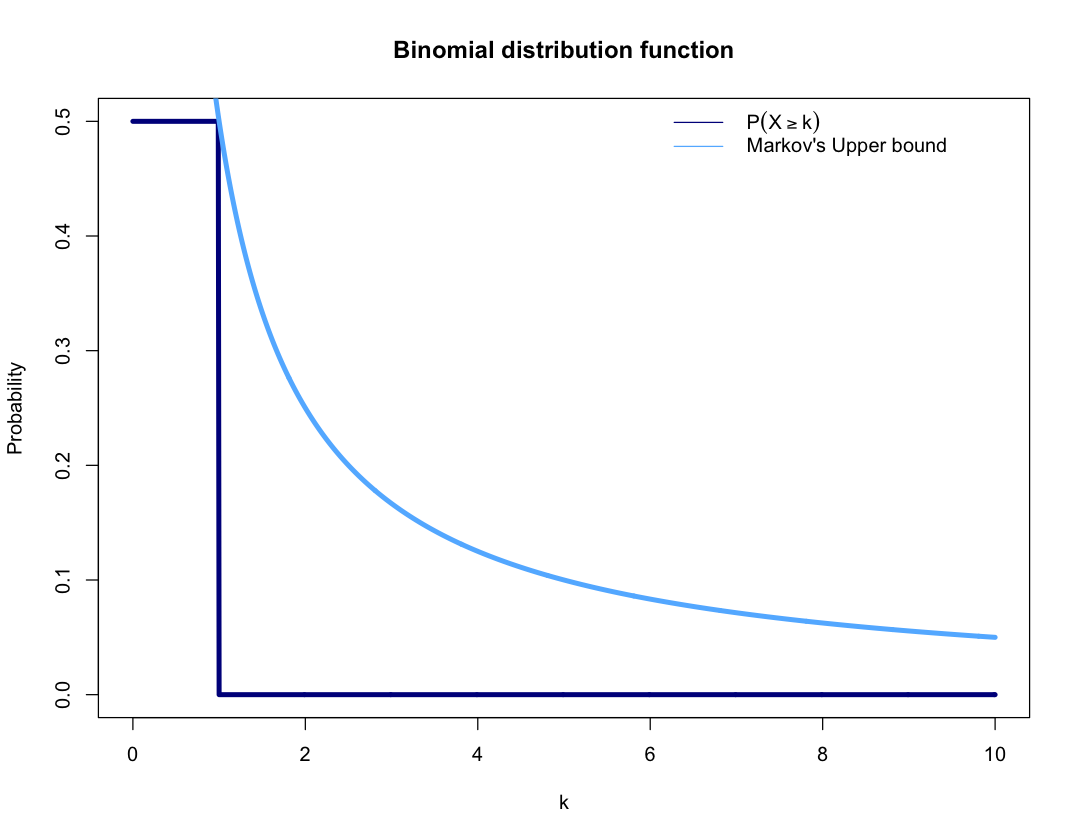

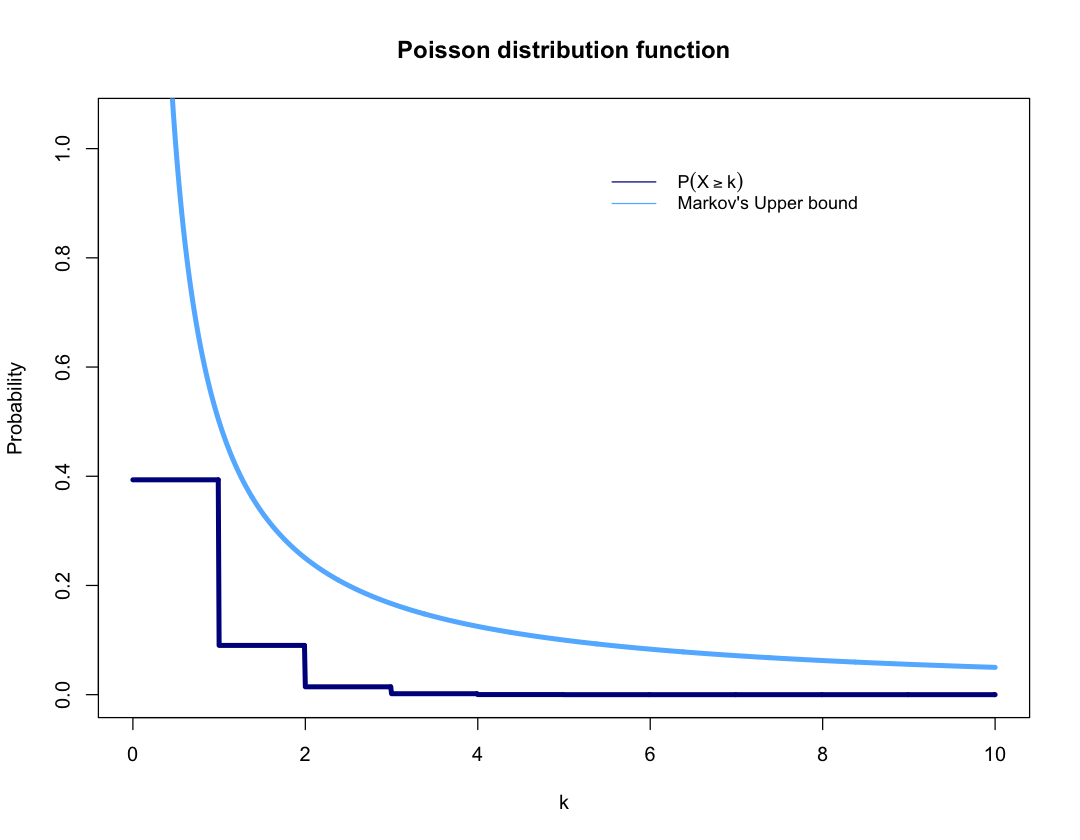

In [7]:
#Binomial distribution function
n=1
p=1/2
x = seq(0,10,by=0.01)
k=x
G=1-pbinom(x,n,p)

expect=n*p
MI=expect/k

plot(x,G, type='l', col="darkblue", xlab='k', ylab="Probability",main='Binomial distribution function',lwd=4)

lines(k,MI, type='l', col="steelblue1",lwd=4)

legend("topright",legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("darkblue", "steelblue1"), lty=1:1,box.lty=0)


#Poisson distribution function
lambda=1/2
G=1-ppois(x,lambda)
x = seq(0,10,by=0.01)
k=x
expected = lambda 
MI = expected/k 


plot(x,G, type='l', col="darkblue", xlab='k', ylab="Probability",main='Poisson distribution function',
     ylim=c(0,1.05),lwd=4)

lines(k,MI, type='l', col= "steelblue1", lty=1,lwd=4)


legend("topright", inset=0.1,legend=c(expression(P(X>=k)),"Markov's Upper bound"),
       col=c("darkblue", "steelblue1"), lty=1:1, cex=0.9,
       box.lty=0)


## Exercise 3 - Chebyshev's Inequality

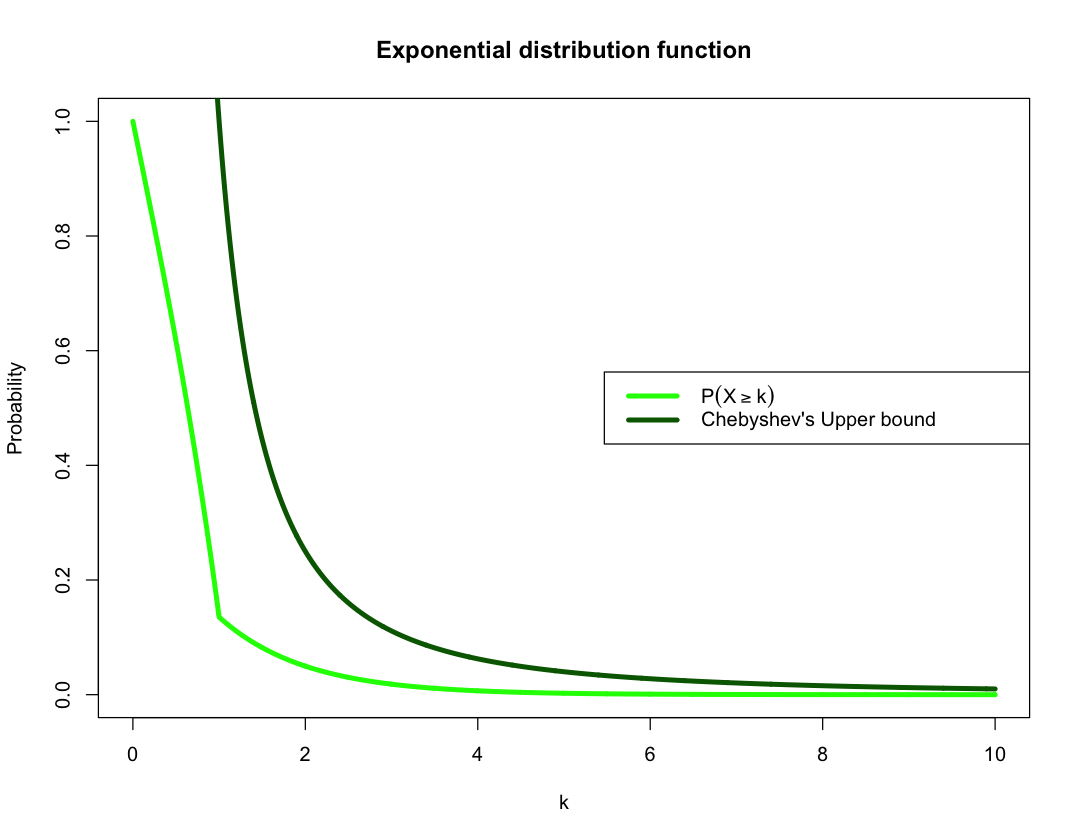

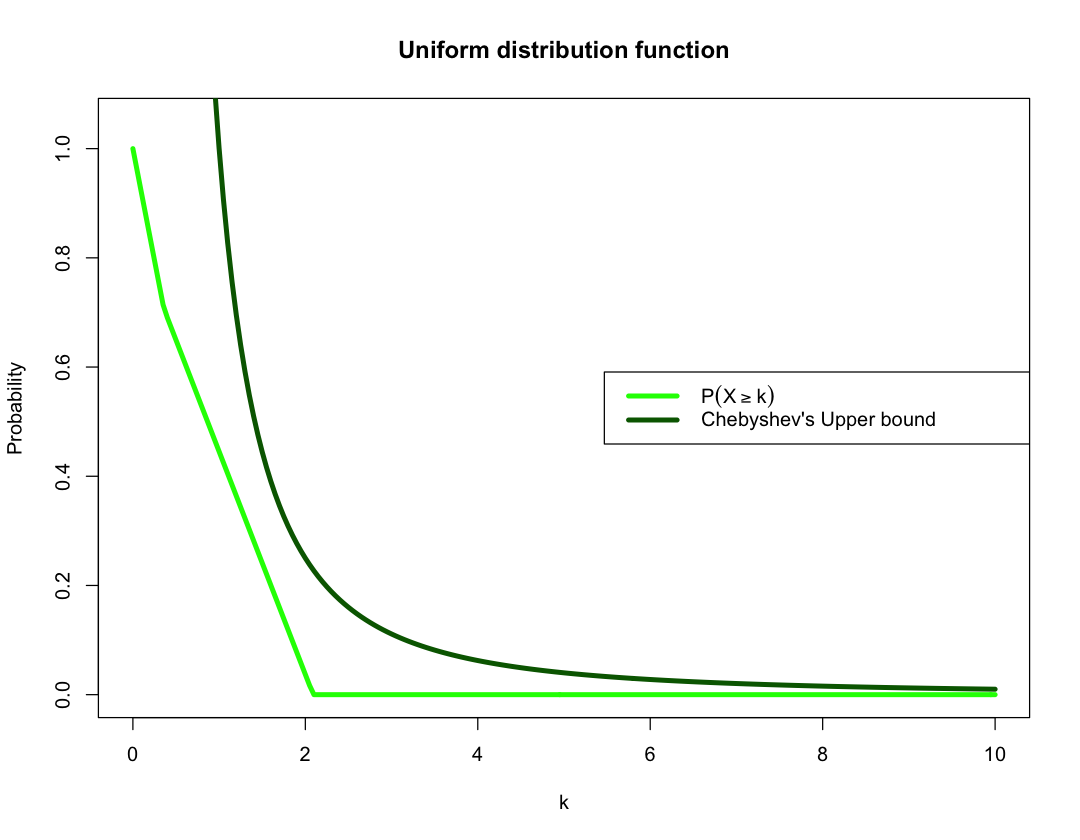

In [8]:


#Exponential distribution function
x = seq(0,10,by=0.005)
lambda = 1
k = x


mu = 1/lambda
sigma = 1/lambda

G = 1 - pexp((x*sigma+mu),lambda) + pexp((-x*sigma+mu),lambda)

CI=1/k**2
plot(x,G, type='l', col='green', xlab='k', ylab="Probability",main='Exponential distribution function',lwd=4)

lines(k,CI, type='l', col='darkgreen',lwd=4)

legend("right",legend=c(expression(P(X>=k)),"Chebyshev's Upper bound"),
       col=c("green", "darkgreen"), lwd=4:4)



# Uniform distribution function
x = seq(0,10,by=0.05)
min = 1 - sqrt(2)
max = 1 + sqrt(2)

mu = (a+b)/2 # expectation value
sigma = (b-a)/sqrt(12)

G <- 1- punif((x*sigma+mu),min,max) + punif((-x*sigma+mu),min,max)

# Compute the upper bound
k = x
CI = 1/(k^2) # vector of upper bounds

# Plot the distribution and the Chebyshev's upper bound
plot(x,G, type='l', col='green', xlab='k', ylab="Probability",
     ylim=c(0,1.05), lwd=4,main='Uniform distribution function')

lines(k,CI, type='l', col='darkgreen', lwd=4)

legend("right",legend=c(expression(P(X>=k)),"Chebyshev's Upper bound"),
       col=c("green", "darkgreen"),lwd=4:4)

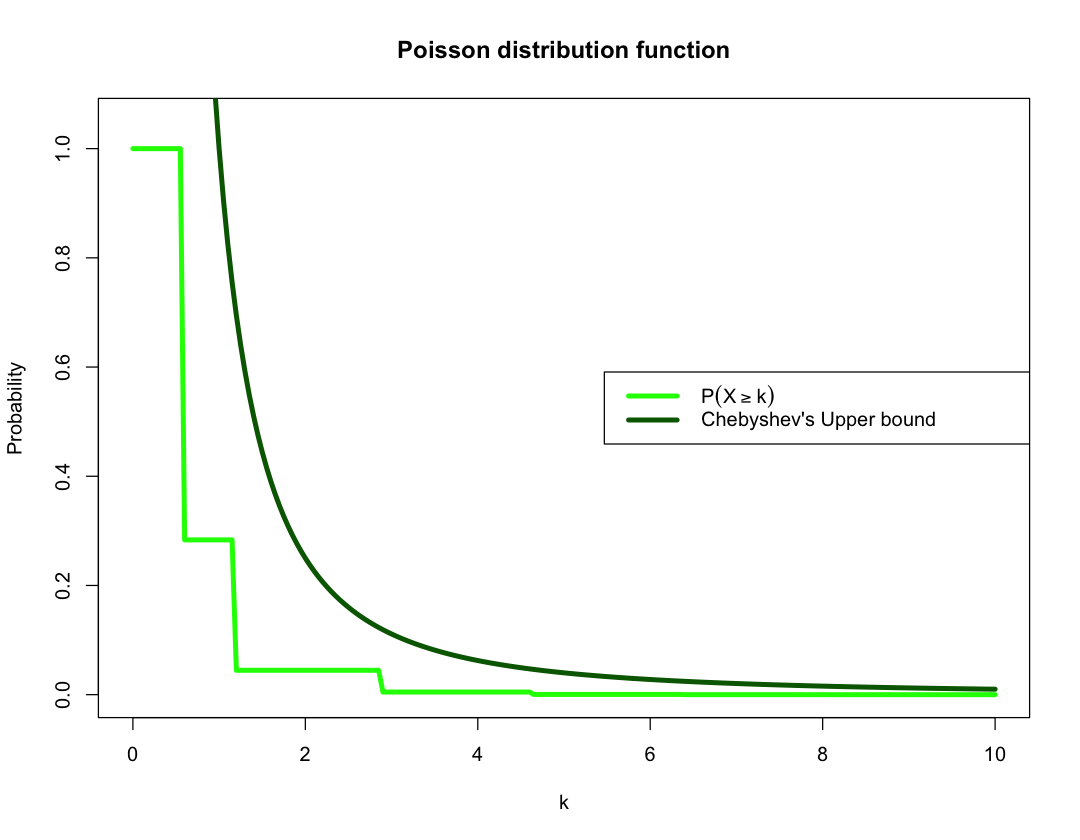

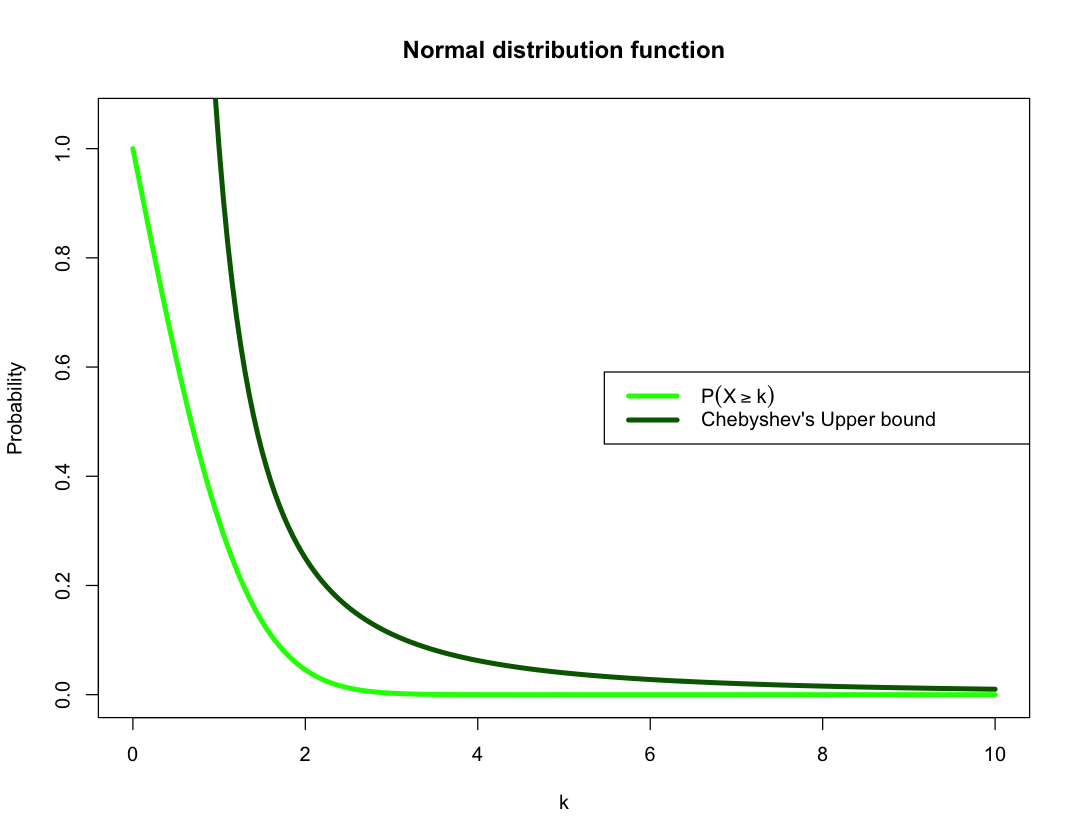

In [9]:
# Poisson distribution function

x = seq(0,10,by=0.05)

lambda = 1/3
mu = lambda # expectation value
sigma = sqrt(lambda) # variance

G = 1 - ppois((x*sigma+mu),lambda) + ppois((-x*sigma+mu),lambda)

# Compute the upper bound
k = x
CI = 1/(k^2) # vector of upper bounds

# Plot the distribution and the Chebyshev's upper bound
plot(x,G, type='l', col='green', xlab='k', ylab="Probability",
     ylim=c(0,1.05),lwd=4,main='Poisson distribution function')

lines(k,CI, type='l', col='darkgreen', lwd=4)

legend("right",legend=c(expression(P(X>=k)),"Chebyshev's Upper bound"),
       col=c("green", "darkgreen"), lwd=4:4)


# Normal distribution function


x = seq(0,10,by=0.05)

mu = 3 # expectation value
sigma = 5 

G = 1 - pnorm((x*sigma+mu),mean=mu,sd=sigma) + pnorm((-x*sigma+mu),mean=mu,sd=sigma)

# Compute the upper bound
k = x
CI = 1/(k^2) # vector of upper bounds

# Plot the distribution and the Chebyshev's upper bound
plot(x,G, type='l', col='green', xlab='k', ylab="Probability",  
        main='Normal distribution function',
     ylim=c(0,1.05),lwd=4)

lines(k,CI, type='l', col='darkgreen', lwd=4)

legend("right",legend=c(expression(P(X>=k)),"Chebyshev's Upper bound"),
       col=c("green", "darkgreen"), lwd=4:4)

## Exercise 4 - Community Mobility Open Data

In [20]:
library(tidyverse)

In [11]:
name <- "2020_RU_Region_Mobility_Report.csv"
russia <- read.csv(file = name)
russia <- as_tibble(russia)


full_russia = mutate(russia, week = lubridate::week(date), month = lubridate::month(date))
week_russia = full_russia %>% group_by(week) %>% summarise (retail_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline))
month_russia = full_russia %>% group_by(month) %>% summarise (retail_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline))

In [12]:
name <- "2020_BE_Region_Mobility_Report.csv"
belgium <- read.csv(file = name)
belgium <- as_tibble(belgium)
full_belgium = mutate(belgium, week = lubridate::week(date), month = lubridate::month(date))
week_belgium = full_belgium %>% group_by(week) %>% summarise (retail_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline))
month_belgium = full_belgium %>% group_by(month) %>% summarise (retail_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline))

In [13]:
name <- "2020_GR_Region_Mobility_Report.csv"
greece <- read.csv(file = name)
greece <- as_tibble(greece)
full_greece = mutate(greece, week = lubridate::week(date), month = lubridate::month(date))
week_greece = full_greece %>% group_by(week) %>% summarise (retail_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline))

month_greece = full_greece %>% group_by(month) %>% summarise (retail_mean = mean(retail_and_recreation_percent_change_from_baseline), 
                                                            transit_mean = mean(transit_stations_percent_change_from_baseline),
                                                            work_mean = mean(workplaces_percent_change_from_baseline),
                                                            home_mean = mean(residential_percent_change_from_baseline))

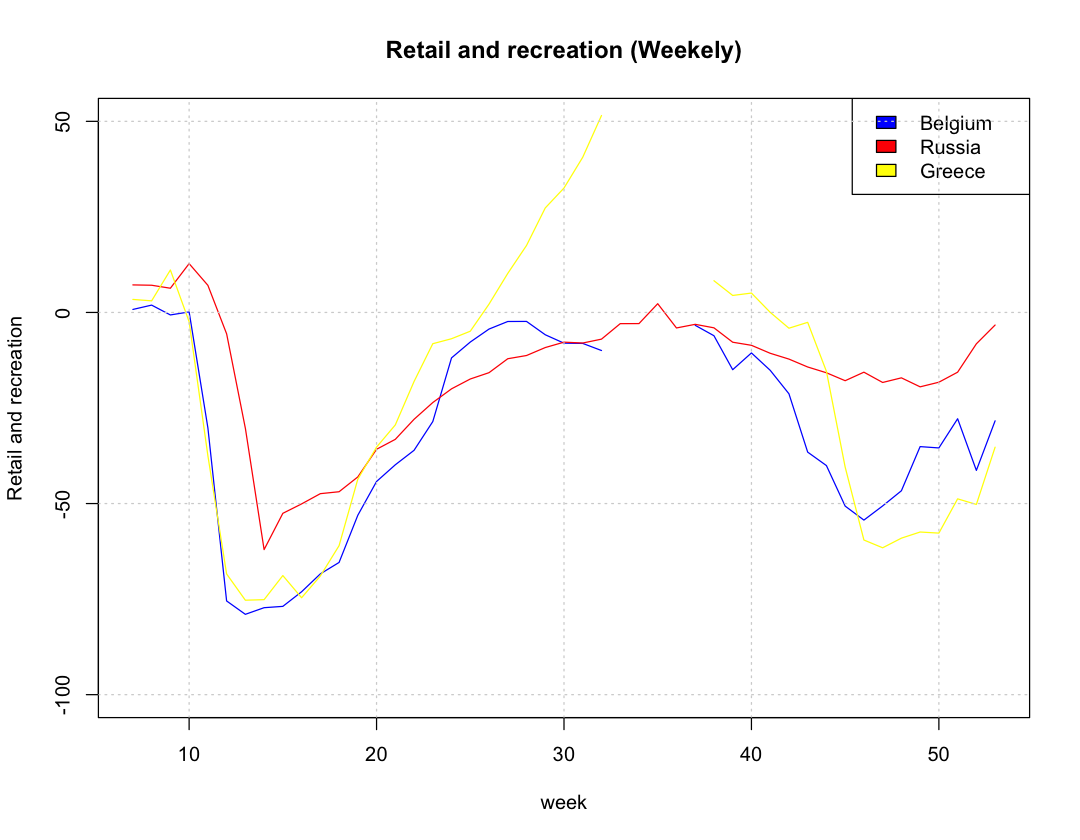

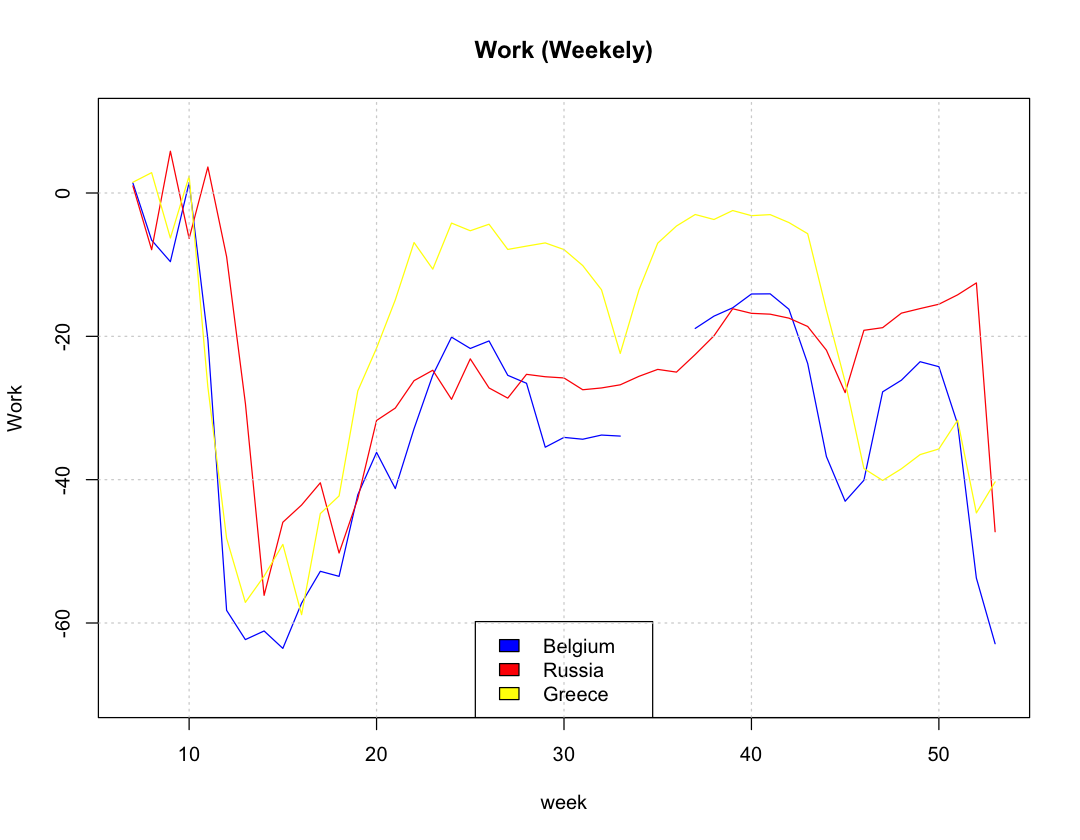

In [14]:
plot(week_belgium$week,week_belgium$retail_mean, type="l",col="blue",main='Retail and recreation (Weekely)',
    ylab='Retail and recreation',xlab='week',ylim = c(-100,50))
lines(week_russia$week,week_russia$retail_mean, col="red")
lines(week_greece$week,week_greece$retail_mean, col="yellow")
legend("topright",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))

grid()


plot(week_belgium$week,week_belgium$work_mean, type="l",col="blue",main='Work (Weekely)',
    ylab='Work',xlab='week',ylim = c(-70,10))
lines(week_russia$week,week_russia$work_mean, col="red")
lines(week_greece$week,week_greece$work_mean, col="yellow")
legend("bottom",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))
grid()

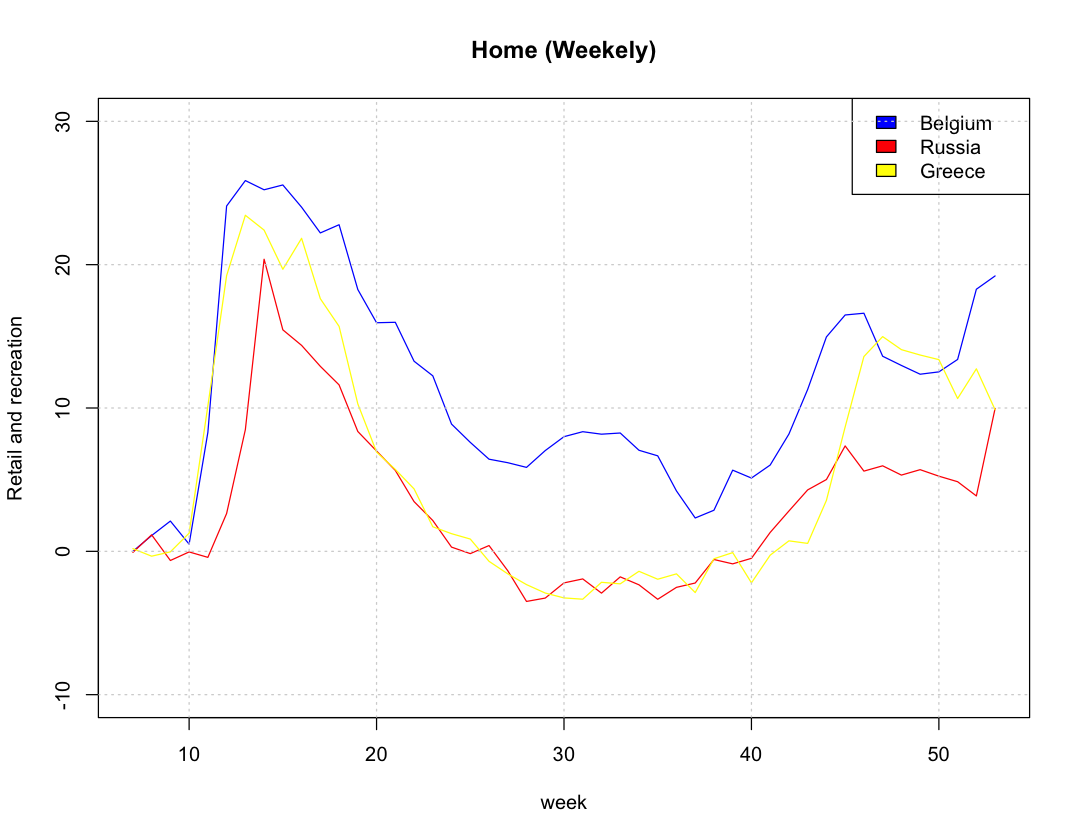

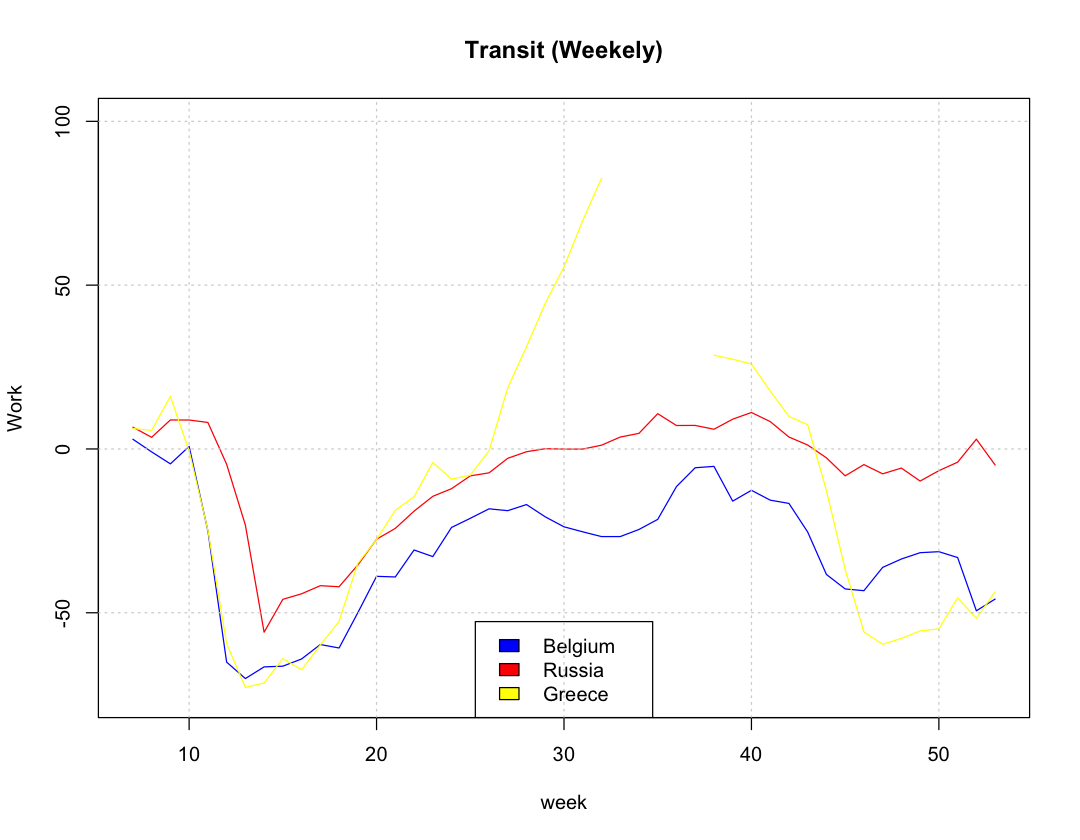

In [15]:
plot(week_belgium$week,week_belgium$home_mean, type="l",col="blue",main='Home (Weekely)',
    ylab='Retail and recreation',xlab='week',ylim = c(-10,30))
lines(week_russia$week,week_russia$home_mean, col="red")
lines(week_greece$week,week_greece$home_mean, col="yellow")
legend("topright",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))

grid()


plot(week_belgium$week,week_belgium$transit_mean, type="l",col="blue",main='Transit (Weekely)',
    ylab='Work',xlab='week',ylim = c(-75,100))
lines(week_russia$week,week_russia$transit_mean, col="red")
lines(week_greece$week,week_greece$transit_mean, col="yellow")
legend("bottom",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))
grid()

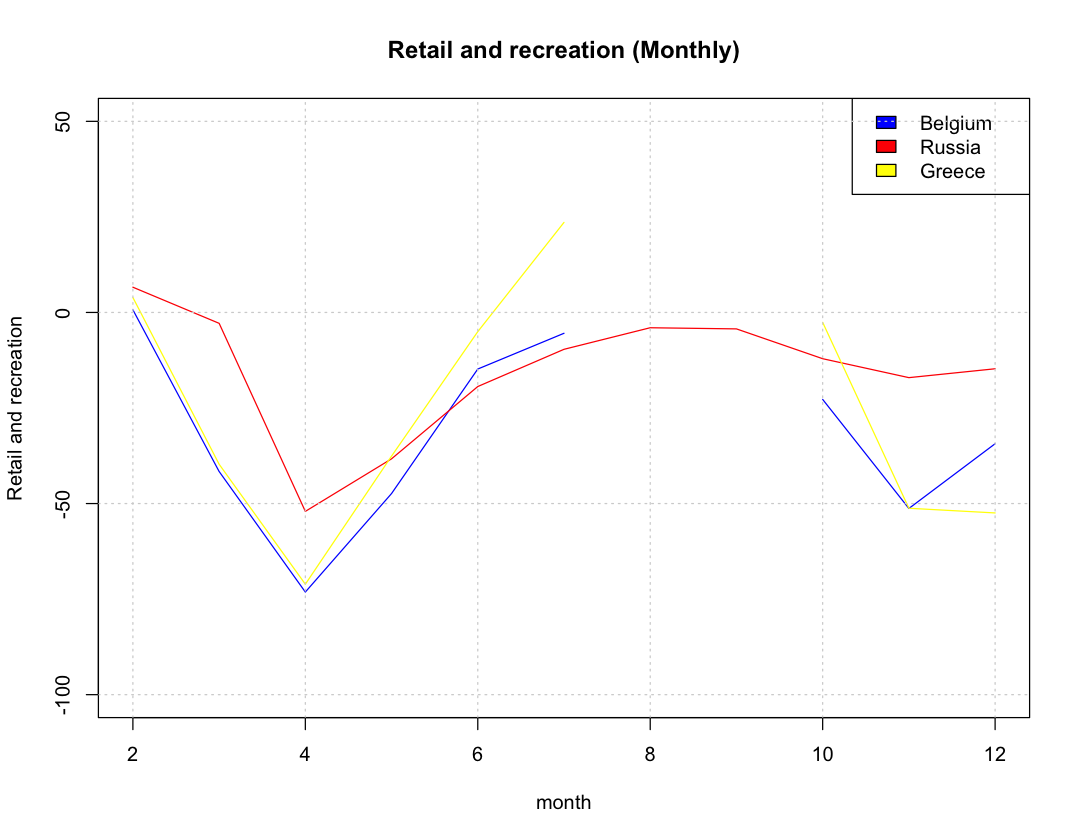

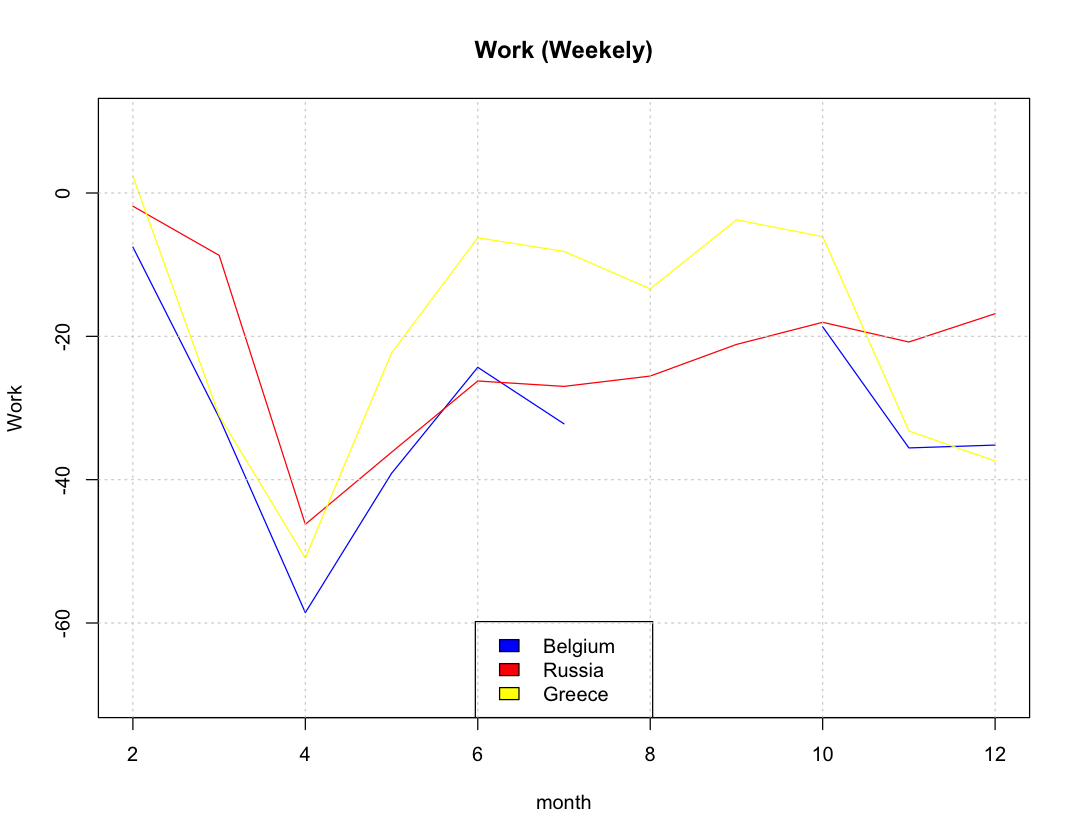

In [16]:
plot(month_belgium$month,month_belgium$retail_mean, type="l",col="blue",main='Retail and recreation (Monthly)',
    ylab='Retail and recreation',xlab='month',ylim = c(-100,50))
lines(month_russia$month,month_russia$retail_mean, col="red")
lines(month_greece$month,month_greece$retail_mean, col="yellow")
legend("topright",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))

grid()


plot(month_belgium$month,month_belgium$work_mean, type="l",col="blue",main='Work (Weekely)',
    ylab='Work',xlab='month',ylim = c(-70,10))
lines(month_russia$month,month_russia$work_mean, col="red")
lines(month_greece$month,month_greece$work_mean, col="yellow")
legend("bottom",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))
grid()

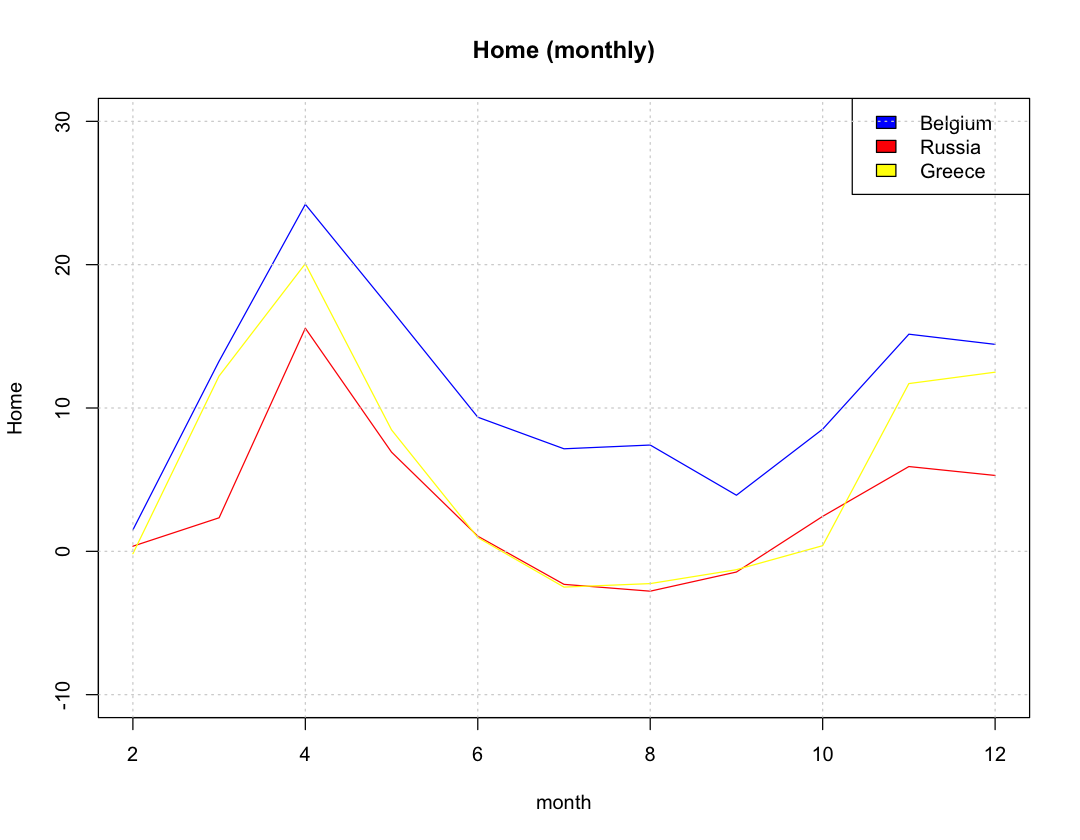

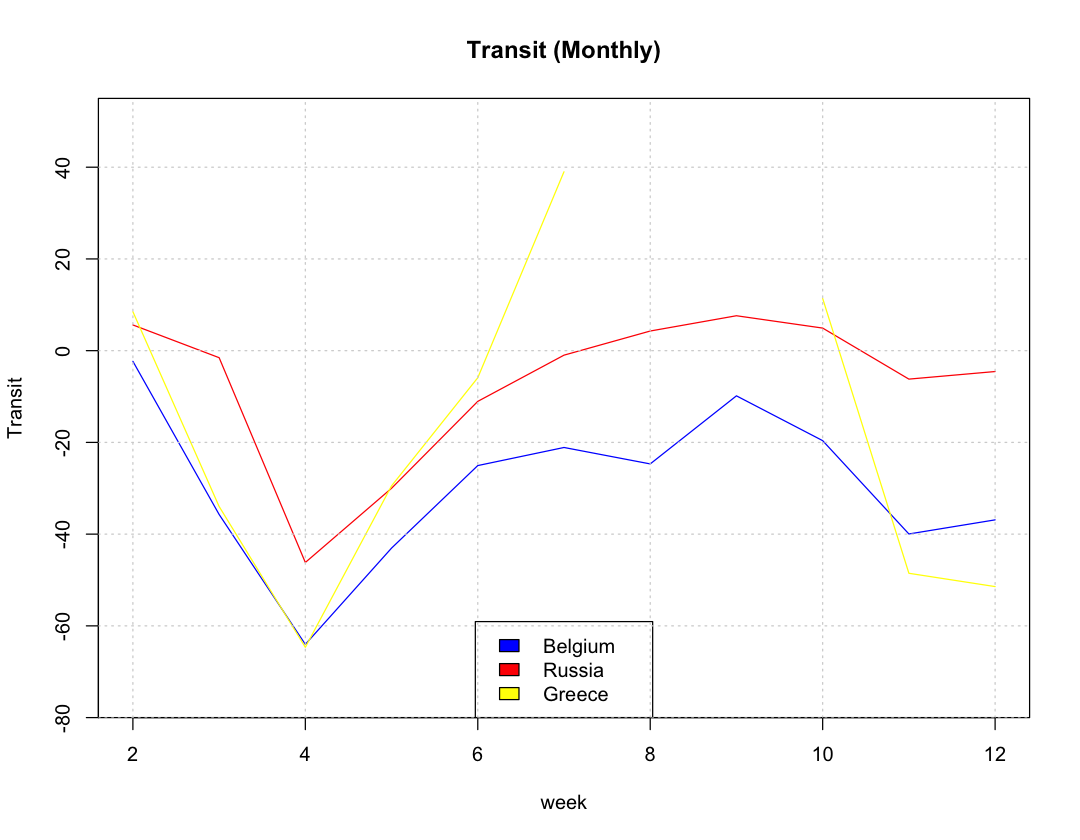

In [17]:
plot(month_belgium$month,month_belgium$home_mean, type="l",col="blue",main='Home (monthly)',
    ylab='Home',xlab='month',ylim = c(-10,30))
lines(month_russia$month,month_russia$home_mean, col="red")
lines(month_greece$month,month_greece$home_mean, col="yellow")
legend("topright",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))

grid()


plot(month_belgium$month,month_belgium$transit_mean, type="l",col="blue",main='Transit (Monthly)',
    ylab='Transit',xlab='week',ylim = c(-75,50))
lines(month_russia$month,month_russia$transit_mean, col="red")
lines(month_greece$month,month_greece$transit_mean, col="yellow")
legend("bottom",legend=c("Belgium","Russia","Greece"),fill=c('blue','red','yellow'))
grid()

As we can see from the graphs, Covid-19 really change people behaviours, in every aspect of life. This is true for all the country, as we can see considering 3 countrys such as Belgium, Russia and Greece; whit different clima, economy and population.